In [328]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import scipy.io.wavfile
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [329]:
list=os.listdir(path='free-spoken-digit/dev') # list files in a directory

In [330]:
labels=[]
for i in list:
    labels.append(i[-5:-4])

In [331]:
data=[]
for i in list:
    data.append((scipy.io.wavfile.read('free-spoken-digit/dev'+"/"+i)[1]))

In [332]:
len(data[0])

3124

In [333]:
len(data)

1500

In [371]:
n_chunks=12 #Number of groups that I want to have
data_2 = [np.array_split(row,n_chunks) for row in data ]
lenght=[len(row)for row in data]

In [372]:
len(data_2[0]) 

12

In [373]:
lenght#The lenght are different

[3124,
 3103,
 2415,
 4751,
 3888,
 3945,
 2621,
 1781,
 3204,
 3601,
 2149,
 3114,
 5563,
 3131,
 3401,
 2414,
 2797,
 3096,
 3005,
 1749,
 3201,
 4196,
 2377,
 3165,
 3303,
 3179,
 2863,
 4001,
 2223,
 1560,
 1294,
 2324,
 3865,
 3722,
 3519,
 4062,
 4881,
 2876,
 3858,
 2688,
 3631,
 3611,
 2589,
 3748,
 2863,
 2982,
 3284,
 3119,
 2219,
 3207,
 3745,
 4939,
 2422,
 3327,
 2446,
 2353,
 2922,
 4023,
 2044,
 2109,
 5201,
 2235,
 1866,
 2655,
 3428,
 2672,
 5090,
 2786,
 6925,
 3441,
 2210,
 2078,
 4111,
 3890,
 2274,
 2732,
 4689,
 3160,
 2469,
 3425,
 3910,
 3778,
 5696,
 1903,
 2705,
 3591,
 3671,
 1475,
 5065,
 3547,
 2624,
 1778,
 3756,
 5639,
 3356,
 3117,
 4687,
 3693,
 2261,
 2758,
 3670,
 2061,
 3601,
 4213,
 2267,
 3582,
 1609,
 2986,
 2165,
 2067,
 2474,
 2373,
 2106,
 3877,
 3829,
 4852,
 2544,
 3424,
 2550,
 3332,
 2892,
 1640,
 3537,
 2781,
 5177,
 2584,
 3087,
 3571,
 3328,
 2001,
 4089,
 4133,
 4169,
 2463,
 2194,
 3796,
 3145,
 2754,
 2982,
 2238,
 2519,
 4307,
 1819,

In [374]:
df={}
c=0
for raw in data_2:
    mean_1=[]
    desv_1=[]
    for vect in raw:
        mean_1.append(vect.mean())
        desv_1.append(vect.std())
        
    df[f'{c}']=np.concatenate((mean_1,desv_1)) #Now we need to put the deviations and the means in just one column 
    c+=1
    #The rank is ready
    #The original lenght too

In [375]:
df=pd.DataFrame(df)

In [376]:
df=df.T

In [377]:
df['lenght']=lenght
df['labels']=labels

In [378]:
df.head() #Visualize the data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,lenght,labels
0,-65.961686,-13.850575,26.547893,97.015326,-38.569231,-2.815385,-12.907692,11.346154,-2.450000,1.396154,...,1899.675118,1371.262842,770.017737,292.539602,200.110300,130.740468,114.645248,88.179584,3124,4
1,0.687259,-10.482625,-5.482625,12.884170,-1.235521,-3.027027,3.961390,-2.647287,1.248062,-4.744186,...,503.047111,359.296668,286.948354,304.800741,281.767539,190.410604,58.733947,16.476897,3103,0
2,-211.643564,-283.881188,-220.514851,-224.159204,-256.000000,-188.497512,-220.338308,-249.631841,-275.104478,-166.845771,...,2537.356575,2322.044971,1644.075692,1141.283577,1008.581327,645.926001,378.755069,292.281164,2415,1
3,0.452020,1.366162,-5.239899,122.613636,-96.646465,-18.232323,-2.613636,1.585859,-0.712121,0.121212,...,9746.970214,3431.737426,535.149162,393.523189,159.331710,88.813932,58.535065,56.997783,4751,6
4,0.225309,0.333333,-57.814815,92.740741,-38.391975,-152.567901,227.385802,-62.407407,-14.145062,25.577160,...,2834.759629,4779.204301,4605.606760,2333.955181,1361.771198,965.724213,539.060802,290.876327,3888,2


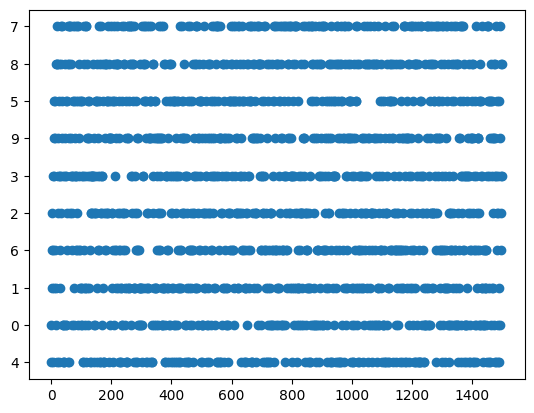

In [408]:
plt.scatter(range(len(labels)),labels)

In [379]:
df.shape

(1500, 26)

In [380]:
null=pd.DataFrame(df.isna().sum())

In [381]:
null[null[0]!=0] #There are null data

,0


In [382]:
df.fillna(0,inplace=True) #Fill the null data

In [383]:
x=df.iloc[:,:-1].values #I need to obtain the values of the feautures of the dataset
y=df.iloc[:,-1].values#I need to obtain the values of the labels of the dataset

In [384]:
#We are gonna normalize in order to improve the accurracy (0.22916666666666666)
from sklearn import preprocessing
standard = preprocessing.scale(x)

In [385]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(x,y,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices] #The valid values are use to find the best hyperparameters
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]

In [386]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
standard_train_valid, standard_test, y_train_valid_1, y_test_1 = train_test_split(standard,y,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(standard_train_valid):
    s_train = standard_train_valid[train_indices]
    s_valid = standard_train_valid[validation_indices] #The valid values are use to find the best hyperparameters
    y_train_1 = y_train_valid_1[train_indices]
    y_valid_1 = y_train_valid_1[validation_indices]

In [387]:
def best_param(model,params,X_train,y_train,X_valid,y_valid):
    from sklearn.model_selection import ParameterGrid
    max_accuracy = 0
    best_config = None

    for config in ParameterGrid(params):
        clf = model(**config)
        clf.fit(X_train,y_train)
        y_pred_DT = clf.predict(X_valid)
        val=(accuracy_score(y_valid,y_pred_DT))

        if val > max_accuracy:
                max_accuracy = val
                best_config = config

    print("Best Configuration:")
    for key, value in best_config.items():
        print(f"{key}: {value}")
    print(f"Best Accuracy: {max_accuracy:.4f}")
    return y_pred_DT



In [388]:
params_DesT ={ #Define the possible values of the parameters in the models
     "max_depth": [None, 2, 4, 8, 10],
     "splitter": ["best", "random"],
     "max_features":[13,7,3,10],
     "ccp_alpha":[0,0.3,0.6,0.8], 
     "min_impurity_decrease":[0.01,0.02,0.0,0.5]
}

params_Random_Forest={
     "criterion" : ["gini","entropy","log_loss"],
    "max_depth": [None, 100,2,50,15],
    "max_features": ['sqrt', 'log2', 0.5,100],
    "max_leaf_nodes": [None, 100,2,50,10],
    "ccp_alpha": [0.0,0.7,0.4,0.2,]
}

params_GaussianNB={
    "var_smoothing": [1e-9,0.05,0.1,0.5,0.005]
}

In [389]:
best_param(DecisionTreeClassifier,params_DesT,X_train,y_train,X_valid,y_valid)

Best Configuration:
ccp_alpha: 0
max_depth: None
max_features: 7
min_impurity_decrease: 0.0
splitter: best
Best Accuracy: 0.4542


array(['9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9

In [390]:
#best_param(RandomForestClassifier,params_Random_Forest,X_train,y_train,X_valid,y_valid)

In [391]:
best_param(GaussianNB,params_GaussianNB,X_train,y_train,X_valid,y_valid)

Best Configuration:
var_smoothing: 0.1
Best Accuracy: 0.2625


array(['4', '8', '8', '7', '9', '9', '9', '3', '8', '8', '8', '8', '2',
       '7', '2', '8', '7', '8', '9', '9', '9', '8', '8', '9', '7', '8',
       '4', '9', '8', '5', '7', '8', '7', '2', '0', '3', '7', '8', '8',
       '8', '2', '2', '8', '7', '8', '7', '9', '0', '8', '2', '8', '8',
       '4', '0', '2', '2', '8', '8', '8', '4', '2', '2', '8', '8', '2',
       '8', '0', '8', '2', '8', '8', '8', '8', '8', '3', '0', '8', '2',
       '8', '4', '9', '7', '2', '8', '4', '4', '2', '8', '4', '0', '8',
       '4', '2', '2', '2', '2', '8', '4', '9', '8', '2', '0', '8', '7',
       '4', '8', '8', '8', '7', '8', '8', '8', '4', '8', '8', '2', '4',
       '8', '0', '9', '2', '8', '8', '8', '2', '8', '4', '0', '2', '0',
       '8', '8', '0', '8', '6', '4', '4', '8', '8', '0', '8', '8', '8',
       '4', '8', '8', '8', '8', '7', '2', '4', '4', '4', '8', '8', '6',
       '4', '8', '2', '8', '8', '7', '3', '8', '8', '0', '8', '4', '8',
       '8', '8', '8', '7', '9', '8', '8', '4', '8', '4', '8', '8

In [392]:
#Now we are gonna try with the normalized data
best_param(DecisionTreeClassifier,params_DesT,s_train,y_train_1,s_valid,y_valid_1) #The best option

Best Configuration:
ccp_alpha: 0
max_depth: 10
max_features: 13
min_impurity_decrease: 0.0
splitter: best
Best Accuracy: 0.5042


array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [393]:
#best_param(RandomForestClassifier,params_DesT,s_train,y_train_1,s_valid,y_valid_1)

In [394]:
best_param(GaussianNB,params_GaussianNB,s_train,y_train_1,s_valid,y_valid_1)

Best Configuration:
var_smoothing: 0.1
Best Accuracy: 0.2083


array(['3', '8', '8', '7', '4', '2', '0', '0', '8', '8', '7', '7', '7',
       '8', '8', '7', '6', '7', '7', '0', '8', '3', '7', '8', '8', '8',
       '3', '8', '8', '8', '7', '8', '8', '7', '8', '3', '8', '8', '8',
       '7', '7', '8', '4', '8', '3', '4', '7', '6', '8', '0', '8', '7',
       '5', '8', '7', '7', '6', '7', '0', '8', '8', '8', '8', '3', '8',
       '8', '4', '8', '7', '1', '8', '8', '8', '8', '7', '0', '9', '8',
       '2', '8', '6', '0', '9', '8', '7', '3', '8', '4', '8', '8', '8',
       '0', '4', '8', '8', '4', '8', '3', '4', '8', '8', '7', '8', '8',
       '8', '7', '7', '6', '8', '7', '7', '8', '8', '8', '8', '0', '8',
       '1', '8', '0', '3', '8', '8', '8', '8', '7', '8', '8', '6', '8',
       '0', '0', '1', '0', '8', '3', '8', '7', '8', '7', '7', '6', '7',
       '7', '7', '8', '8', '2', '8', '7', '0', '2', '7', '4', '8', '8',
       '7', '7', '4', '8', '5', '7', '8', '1', '8', '8', '8', '3', '5',
       '3', '3', '7', '7', '8', '8', '1', '8', '7', '8', '8', '8

In [395]:
#Now We are going to apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(x)

array([[ 2922.94286244, -3880.21289953],
       [-2912.93948421,   -59.07239866],
       [  754.13935287,   845.33237462],
       ...,
       [ -582.45390316,  2827.34016741],
       [-3492.0209988 ,  -413.98150732],
       [-2933.0750344 ,   -66.03914758]])

In [396]:
X_p=pca.fit_transform(standard)

In [397]:
#After the pca we can prove again the split and models
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
p_train_valid, p_test, y_train_valid_2, y_test_2 = train_test_split(X_p,y,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    p_train = p_train_valid[train_indices]
    p_valid = p_train_valid[validation_indices] #The valid values are use to find the best hyperparameters
    y_train_2 = y_train_valid_2[train_indices]
    y_valid_2 = y_train_valid_2[validation_indices]

In [398]:
best_param(DecisionTreeClassifier,params_DesT,p_train,y_train_2,p_valid,y_valid_2) #The accuracy improve in a 5%

Best Configuration:
ccp_alpha: 0
max_depth: None
max_features: 7
min_impurity_decrease: 0.0
splitter: random
Best Accuracy: 0.2333


array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [399]:
#best_param(RandomForestClassifier,params_DesT,p_train,y_train_2,p_valid,y_valid_2) #too big

In [400]:
best_param(GaussianNB,params_GaussianNB,p_train,y_train_2,p_valid,y_valid_2) #The accuracy just was worst

Best Configuration:
var_smoothing: 0.05
Best Accuracy: 0.1208


array(['6', '6', '3', '3', '0', '6', '3', '6', '7', '6', '3', '6', '6',
       '3', '3', '6', '6', '7', '6', '6', '6', '6', '4', '6', '0', '6',
       '6', '3', '6', '6', '6', '6', '6', '6', '6', '4', '3', '6', '6',
       '6', '6', '3', '6', '3', '6', '6', '7', '6', '6', '0', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '3', '6', '6', '6', '6',
       '6', '6', '3', '6', '3', '6', '6', '6', '6', '3', '6', '3', '6',
       '3', '3', '3', '6', '6', '1', '6', '6', '6', '3', '6', '6', '1',
       '6', '3', '6', '0', '7', '3', '6', '6', '3', '3', '6', '3', '3',
       '3', '6', '6', '5', '6', '6', '6', '6', '6', '6', '6', '3', '3',
       '3', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6',
       '6', '0', '5', '5', '6', '6', '6', '3', '6', '6', '6', '3', '6',
       '2', '6', '3', '0', '6', '6', '6', '6', '6', '6', '6', '6', '6',
       '6', '6', '6', '6', '6', '2', '6', '6', '6', '3', '3', '2', '6',
       '6', '6', '6', '6', '6', '6', '3', '6', '0', '6', '6', '6

In [401]:
#The pca have not give us better methods results allora we won't use it

In [402]:
clf=DecisionTreeClassifier(max_depth=10,min_impurity_decrease=0.01)

In [403]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01)

In [404]:
y_predict=clf.predict(X_valid)

In [405]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [406]:
acc=accuracy_score(y_valid,y_predict)
p,r,f1,s = precision_recall_fscore_support(y_valid, y_predict)

c:\Users\alejandrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [407]:
print("accuracy_score",acc)
print("precision",p)
print("recall",r)
print("f1",f1.mean())
print("s",s)

accuracy_score 0.3458333333333333
precision [0.71428571 0.         0.63157895 0.25806452 0.13333333 0.52941176
 0.22727273 0.33333333 0.66666667 0.30645161]
recall [0.2173913  0.         0.54545455 0.57142857 0.07407407 0.28125
 0.26315789 0.375      0.25       0.9047619 ]
f1 0.3155151080993578
s [23 20 22 28 27 32 19 24 24 21]
